In [9]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow as tf
import tensorflow_datasets as tfds
import time 
from sklearn.model_selection import train_test_split
import pandas as pd
import glob
import numpy as np
import random
import csv
import shutil

In [10]:
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# tf.debugging.set_log_device_placement(False)
# os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [11]:

# tf.config.experimental.set_visible_devices([], 'GPU')
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


In [12]:
# Define data folder
DATA_FOLDER = 'dataset/augmentation'
# Define the target folder to save the data
DATASET_PATH = 'dataset/deep-learning'
TRAIN_FOLDER = 'train'
TEST_FOLDER = 'test'
VALIDATION_FOLDER = 'validation'
TRAINING_SET = os.path.join(DATASET_PATH,TRAIN_FOLDER)
TEST_SET = os.path.join(DATASET_PATH,TEST_FOLDER)
VALIDATION_SET = os.path.join(DATASET_PATH,VALIDATION_FOLDER)
TARGET_FOLDER_SET = [TRAINING_SET,TEST_SET,VALIDATION_SET]
CSV_SPLIT_NAME = 'train_test_val.csv'

In [13]:
# Create the target folder if not exist
if not os.path.exists(DATASET_PATH):
    os.makedirs(DATASET_PATH)
for fldr in TARGET_FOLDER_SET:
    if not os.path.exists(fldr):
        os.makedirs(fldr)

In [14]:
# create csv file that contains path to image 
splitData = False
if(splitData):
    data=[]
    target=[]

    for i in glob.glob(DATA_FOLDER+'/*'):
        for aug in glob.glob(i+'/*.*'):
            file = aug.split("\\")[-1].split(".")
            filename = file[0]
            fileext= file[1]
            filestructur = filename.split("_")
            classname = filestructur[0] if len(filestructur) == 3 else filestructur[0]+'_'+filestructur[1]
            data.append(aug)
            target.append(classname)
    data = np.array(data)
    target = np.array(target)
    X_train, X_test_val, y_train, y_test_val = train_test_split(data, target, 
                                                        test_size=0.35,random_state=random.randint(1,200),stratify=target)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, 
                                                        test_size=0.3,random_state=random.randint(1,200),stratify=y_test_val)
    f = open(os.path.join(DATASET_PATH,CSV_SPLIT_NAME), 'w', newline='', encoding='utf-8')
    writer = csv.writer(f)
    for i in range(len(X_train)):
        tmp = [X_train[i], y_train[i], TRAIN_FOLDER]
        writer.writerow(tmp)
    for i in range(len(X_test)):
        tmp = [X_test[i], y_test[i], TEST_FOLDER]
        writer.writerow(tmp)
    for i in range(len(X_val)):
        tmp = [X_val[i], y_val[i], VALIDATION_FOLDER]
        writer.writerow(tmp)
    f.close()
        
    

In [15]:
# Copy file to train, test, and validation folder according to the split data csv
copyingFile=True
if(copyingFile):
    df = pd.read_csv(os.path.join(DATASET_PATH,CSV_SPLIT_NAME), header=None)
    for i in range(len(df)):
        temp = df.iloc[i].values
        filename = temp[0].split("\\")[-1]
        if(temp[2]==TRAIN_FOLDER):
            classFolder = os.path.join(TRAINING_SET,temp[1])
            if not os.path.exists(classFolder):
                os.makedirs(classFolder)
            shutil.copyfile(temp[0],os.path.join(classFolder,filename))
        if(temp[2]==TEST_FOLDER):
            classFolder = os.path.join(TEST_SET,temp[1])
            if not os.path.exists(classFolder):
                os.makedirs(classFolder)
            shutil.copyfile(temp[0],os.path.join(classFolder,filename))
        if(temp[2]==VALIDATION_FOLDER):
            classFolder = os.path.join(VALIDATION_SET,temp[1])
            if not os.path.exists(classFolder):
                os.makedirs(classFolder)
            shutil.copyfile(temp[0],os.path.join(classFolder,filename))
        
            
        

In [16]:

ds_builder = tfds.ImageFolder(DATASET_PATH)
batch_size= 10
print(ds_builder.info)
ds_train = ds_builder.as_dataset(split=TRAIN_FOLDER, shuffle_files=True, as_supervised=True, batch_size=batch_size)
ds_test = ds_builder.as_dataset(split=TEST_FOLDER, shuffle_files=True, as_supervised=True, batch_size=batch_size)
ds_val = ds_builder.as_dataset(split=VALIDATION_FOLDER, shuffle_files=True, batch_size=batch_size, as_supervised=True)



tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='dataset/deep-learning',
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=482),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=14200, num_shards=1>,
        'train': <SplitInfo num_examples=37674, num_shards=1>,
        'validation': <SplitInfo num_examples=6086, num_shards=1>,
    },
    citation="""""",
)


tf.Tensor([480 378 219  90  24 281 272 189 230 291], shape=(10,), dtype=int64)


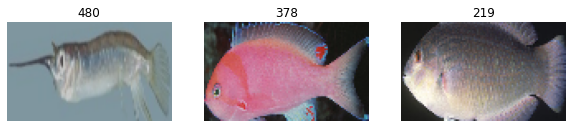

In [17]:
# ds_train, ds_test, ds_val = ds_train / 255.0, ds_test / 255.0, ds_val / 255.0
# assert isinstance(ds_train, dict)
# print(ds_train.keys())
# for images, labels in ds_train.take(1):  # only take first element of dataset
#     numpy_images = images.numpy()
#     numpy_labels = labels.numpy()
#     print(numpy_images.shape, numpy_labels)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
    print(labels)
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[i].numpy())
        plt.axis("off")
    
plt.show()

In [18]:
def tt(x,y):
    print(x)
    return x,y
normalization_layer = tf.keras.layers.Rescaling(1./255)
ds_train = ds_train.map(lambda x, y: (normalization_layer(x), y))
ds_test = ds_test.map(lambda x, y: (normalization_layer(x), y))
ds_val = ds_val.map(lambda x, y: (normalization_layer(x), y))

In [19]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Conv1D
from tensorflow.keras import Model

In [20]:
class Model1(Model):
  def __init__(self):
    super(Model1, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(482)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

In [21]:
model = Model1()

In [22]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

In [23]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [24]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [25]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [26]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in ds_train:
    train_step(images, labels)

  for test_images, test_labels in ds_test:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 1.7837845087051392, Accuracy: 69.35287475585938, Test Loss: 0.22913195192813873, Test Accuracy: 95.54930114746094
Epoch 2, Loss: 0.14719821512699127, Accuracy: 97.54206848144531, Test Loss: 0.18878057599067688, Test Accuracy: 96.54225158691406


In [ ]:
model.save('model/TF_Model1')